In [1]:
import pandas as pd
import networkx as nx
from networkx.algorithms.bipartite.basic import density
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm
import random
import seaborn as sns

In [2]:
listenings = pd.read_csv('preprocessed_data/listenings_with_years_and_users.csv',parse_dates=['timestamp'])
# we only take a look at songs released in the year 2005 and later (when the dataset begins)
listenings = listenings[listenings['year']>=2005]
listenings = listenings[listenings['year']!=2010]
# we create a unique identifier from artist and track name
listenings['art_tra_name'] = listenings['artname'] + '@' + listenings['traname']
# sort the listenings by time
listenings.sort_values(by='timestamp',inplace=True)
listenings.index=listenings['timestamp']
listenings.head()

,userid,timestamp,year,artname,traname,gender,country,art_tra_name
timestamp,,,,,,,,
2005-02-14 06:35:21+00:00,user_000235,2005-02-14 06:35:21+00:00,2005,The Boy Least Likely To,Be Gentle With Me,NaN,United States,The Boy Least Likely To@Be Gentle With Me
2005-02-14 10:34:54+00:00,user_000174,2005-02-14 10:34:54+00:00,2005,Airborn Audio,This Year,NaN,NaN,Airborn Audio@This Year
2005-02-14 12:50:49+00:00,user_000575,2005-02-14 12:50:49+00:00,2008,Fall Out Boy,Tell That Mick He Just Made My List Of Things ...,m,United States,Fall Out Boy@Tell That Mick He Just Made My Li...
2005-02-14 17:56:23+00:00,user_000235,2005-02-14 17:56:23+00:00,2005,Bright Eyes,When The President Talks To God,NaN,United States,Bright Eyes@When The President Talks To God
2005-02-14 18:06:14+00:00,user_000235,2005-02-14 18:06:14+00:00,2005,Bright Eyes,When The President Talks To God,NaN,United States,Bright Eyes@When The President Talks To God


In [3]:
top10Songs2006 = list(listenings[listenings['year']==2006].groupby('art_tra_name').count().sort_values('userid',ascending=False)[:10].index)
top10Songs2006

['Amy Winehouse@Rehab',
 'The Killers@When You Were Young',
 'Snow Patrol@Chasing Cars',
 'Amy Winehouse@Back To Black',
 'Klaxons@Golden Skans',
 'Amy Winehouse@Tears Dry On Their Own',
 'Amy Winehouse@Love Is A Losing Game',
 'Lily Allen@Smile',
 'Dirty Pretty Things@Deadwood',
 'The Killers@Read My Mind']

In [4]:
aggregatedTop10 = listenings[listenings['art_tra_name'].isin(top10Songs2006)].groupby([pd.Grouper(freq="M"), "art_tra_name"]).count()[['userid']].reset_index()

<ipython-input-5-e8c223b66f68>:8: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


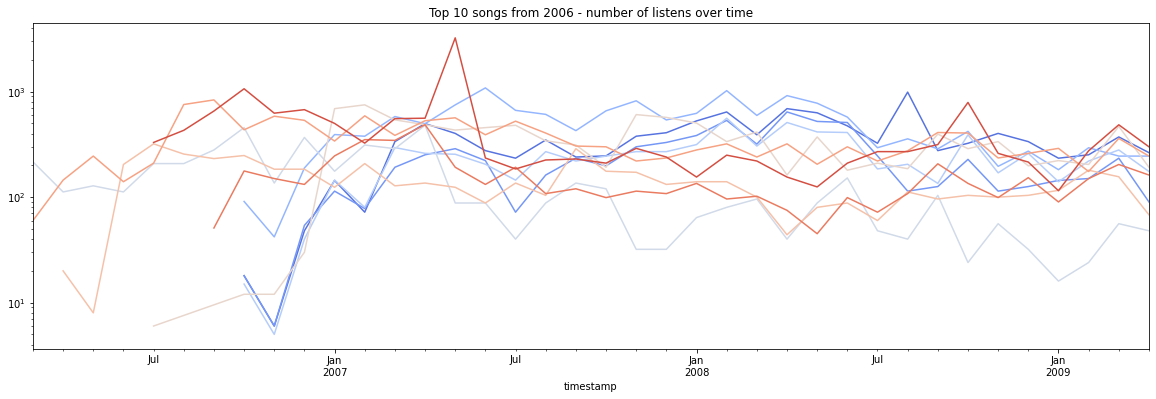

In [5]:
fig, ax= plt.subplots(figsize=(20,6))

colors = sns.color_palette("coolwarm", aggregatedTop10.art_tra_name.nunique())
ax.set_prop_cycle('color', colors)

for idx, gp in aggregatedTop10.groupby('art_tra_name'):
    gp.plot(x='timestamp', y='userid', ax=ax, legend=False)
plt.yscale('log', nonposy='clip')
plt.title('Top 10 songs from 2006 - number of listens over time')
plt.show()

In [6]:
listenings['release_date'] = pd.to_datetime(listenings.year,format='%Y', utc=True)

In [7]:
listenings.head()

,userid,timestamp,year,artname,traname,gender,country,art_tra_name,release_date
timestamp,,,,,,,,,
2005-02-14 06:35:21+00:00,user_000235,2005-02-14 06:35:21+00:00,2005,The Boy Least Likely To,Be Gentle With Me,NaN,United States,The Boy Least Likely To@Be Gentle With Me,2005-01-01 00:00:00+00:00
2005-02-14 10:34:54+00:00,user_000174,2005-02-14 10:34:54+00:00,2005,Airborn Audio,This Year,NaN,NaN,Airborn Audio@This Year,2005-01-01 00:00:00+00:00
2005-02-14 12:50:49+00:00,user_000575,2005-02-14 12:50:49+00:00,2008,Fall Out Boy,Tell That Mick He Just Made My List Of Things ...,m,United States,Fall Out Boy@Tell That Mick He Just Made My Li...,2008-01-01 00:00:00+00:00
2005-02-14 17:56:23+00:00,user_000235,2005-02-14 17:56:23+00:00,2005,Bright Eyes,When The President Talks To God,NaN,United States,Bright Eyes@When The President Talks To God,2005-01-01 00:00:00+00:00
2005-02-14 18:06:14+00:00,user_000235,2005-02-14 18:06:14+00:00,2005,Bright Eyes,When The President Talks To God,NaN,United States,Bright Eyes@When The President Talks To God,2005-01-01 00:00:00+00:00


In [8]:
def forgetting_intensity(listenings,attrName='art_tra_name',attrFilter=None):

    songsAppearedSet = set() #  song_name -> song_release_Date
    totalSongAge = 0 
    randomProbList = []
    ageWeightedProbList = []

    listenedTimeBefore = listenings['timestamp'].iloc[0]
    for name,attr,listenedTime, releaseTime in tqdm(zip(listenings['art_tra_name'],listenings[attrName], listenings['timestamp'], listenings['release_date']),total=len(listenings),
                                                     position=0, leave=True):

        songAge = (listenedTime - releaseTime).total_seconds()
        # ignore if song is song age is negative
        if(songAge<0):
            continue

        # time elapsed from the last litening 
        timeElapsed = (listenedTime - listenedTimeBefore).total_seconds()
        listenedTimeBefore = listenedTime

        # all the songs got older
        totalSongAge += timeElapsed*len(songsAppearedSet)
        songsAppearedSet.add(name)

        # if this was the first time for a song we add its initial age
        totalSongAge += songAge

        # optional filter using datasets user attributes
        if(attrName=='art_tra_name' or attr==attrFilter):
            # completely random probability
            randomProb = 1/len(songsAppearedSet)
            # probability proportional to the song age normalized by the total age of all songs listened to so far
            ageWeightedProb = songAge / totalSongAge

            randomProbList.append(randomProb)
            ageWeightedProbList.append(ageWeightedProb)



    return sum(randomProbList)/sum(ageWeightedProbList)

In [9]:
forgetting_intensity(listenings)

100%|██████████| 2606596/2606596 [00:44<00:00, 58338.85it/s]


10.139120053625032

# Comparing preferential attachment for subsets of the dataset based on the attributes

## User's gender

When we calculate the values for different genders in the data we can see we get a slightly bigger results for males.

In [10]:
forgetting_intensity(listenings,'gender','m')

100%|██████████| 2606596/2606596 [00:44<00:00, 58624.39it/s]


13.026925560287586

In [11]:
forgetting_intensity(listenings,'gender','f')

100%|██████████| 2606596/2606596 [00:43<00:00, 59908.91it/s]


12.076323808662595

## User's geographical area

In [12]:
europeList = ['United Kingdom', 'Finland', 'Germany', 'Sweden', 'Canada', 'Switzerland',
    'Norway', 'Poland', 'Netherlands', 'Belgium', 'Italy', 'Romania',
       'Russian Federation', 'Spain',
       'Ireland','Czech Republic','France', 'China',
       'Austria', 'Slovakia', 'Malta',
       'Latvia', 'Estonia', 'Lithuania',
      'Iceland', 'Bulgaria',
      'Portugal', 'Croatia',  'Serbia', 'Greece', 'Hungary',
       'Bosnia and Herzegovina', 'Slovenia',
       'Belarus',  'Macedonia']

In [13]:
# we rename the European countries so that we have a bigger geographical group which we can compare to the United States
listenings['country'] = listenings['country'].apply(lambda x: 'Europe' if x in europeList else x)

There is almost no difference between the values for users from these two different geographical areas.

In [14]:
forgetting_intensity(listenings,'country','United States')

100%|██████████| 2606596/2606596 [00:42<00:00, 61397.07it/s]


9.10534000100647

In [15]:
forgetting_intensity(listenings,'country','Europe')

100%|██████████| 2606596/2606596 [00:43<00:00, 59971.40it/s]


10.12216524741572

## Song genres

In [24]:
listeningsWithTags = pd.read_csv('preprocessed_data/listenings_with_years_and_tags.csv',parse_dates=['timestamp'])
listeningsWithTags = listeningsWithTags[listeningsWithTags['year']>=2005]
listenings = listenings[listenings['year']!=2010]
listeningsWithTags['art_tra_name'] = listeningsWithTags['artname'] + '@' + listeningsWithTags['traname']
listeningsWithTags.sort_values(by='timestamp',inplace=True)
listeningsWithTags.head()

,userid,timestamp,tid,tag,year,artname,traname,art_tra_name
1022218,user_000235,2005-02-14 06:35:21+00:00,TRIUULX128F146EC75,indie,2005,The Boy Least Likely To,Be Gentle With Me,The Boy Least Likely To@Be Gentle With Me
5142905,user_000575,2005-02-14 12:50:49+00:00,TRPVVWW128F42385E3,rock,2008,Fall Out Boy,Tell That Mick He Just Made My List Of Things ...,Fall Out Boy@Tell That Mick He Just Made My Li...
4443361,user_000235,2005-02-14 17:56:23+00:00,TRMYXPN128F149798D,indie,2005,Bright Eyes,When The President Talks To God,Bright Eyes@When The President Talks To God
4443360,user_000235,2005-02-14 18:06:14+00:00,TRMYXPN128F149798D,indie,2005,Bright Eyes,When The President Talks To God,Bright Eyes@When The President Talks To God
4443359,user_000235,2005-02-14 18:16:05+00:00,TRMYXPN128F149798D,indie,2005,Bright Eyes,When The President Talks To God,Bright Eyes@When The President Talks To God


In [25]:
listeningsWithTags['release_date'] = pd.to_datetime(listeningsWithTags.year,format='%Y', utc=True)

In [26]:
listeningsWithTags['tag'].unique()

array(['indie', 'rock', 'alternative', 'electronic', 'pop'], dtype=object)

In [27]:
intensities = []
for tag in listeningsWithTags['tag'].unique():
    intensities.append(forgetting_intensity(listeningsWithTags[listeningsWithTags['tag']==tag]))

100%|██████████| 447231/447231 [00:07<00:00, 60584.54it/s]


Looking at the results differentiated by songs genre we can clearly see pop genre stands out from the others. Intuitively this is not so surprising as pop music fans are usually the ones that listen to songs which are popular.

<BarContainer object of 5 artists>

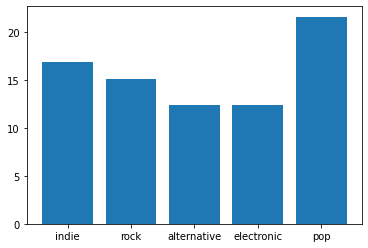

In [28]:
plt.bar(x=listeningsWithTags['tag'].unique(), height=intensities)